In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [293]:
df = pd.read_csv('C:/Users/KahindiE/Desktop/data_science/credit_card_purchases.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [294]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [295]:
df.shape

(1296675, 24)

In [296]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [297]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [298]:
df.duplicated().sum()

0

In [299]:
df[['gender', 'job']]

,gender,job
0,F,"Psychologist, counselling"
1,F,Special educational needs teacher
2,M,Nature conservation officer
3,M,Patent attorney
4,M,Dance movement psychotherapist
...,...,...
1296670,M,Geoscientist
1296671,M,"Production assistant, television"
1296672,M,Naval architect
1296673,M,Volunteer coordinator


In [300]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [301]:
df.iloc[[40,30,90,10000,209]] #iloc is used to select rows and columns by their position

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
40,40,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,...,-98.4462,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,0,68947.0
30,30,2019-01-01 00:22:36,180094608895855,"fraud_Kihn, Abernathy and Douglas",shopping_net,3.66,Tammie,Harper,F,57887 Gutierrez Harbor,...,-122.4810,597,Forensic psychologist,1961-05-19,870c92b288a974a2faf1f24b05c27e33,1325377356,44.278191,-121.815161,0,NaN
90,90,2019-01-01 01:09:22,3592325941359225,fraud_Mraz-Herzog,gas_transport,59.70,Ashley,Robinson,F,1007 Colton Forks,...,-77.2950,31970,Purchasing manager,1935-08-15,9431e17d0ed2ec210587c4085d4c6887,1325380162,36.962777,-77.640054,0,23840.0
10000,10000,2019-01-07 03:53:55,3565423334076143,fraud_Upton PLC,entertainment,110.22,Nathan,Thomas,M,4923 Campbell Pines Suite 717,...,-87.3667,4081,Energy engineer,1938-03-15,84f00e7f5dc19e51d99b500549b5ae44,1325908435,38.447159,-87.503675,0,47640.0
209,209,2019-01-01 02:36:15,3573386445588324,fraud_Keeling-Crist,misc_pos,7.16,Stephanie,Murphy,F,526 Stacy Walks,...,-98.5534,63,Systems developer,1969-10-30,af2d9369bc89ae5db7ef09af1ae62a32,1325385375,46.584094,-97.827871,0,58062.0


In [302]:
df.loc[[0,1,5],['first','last','job','gender','street']] #loc is used to select rows and columns by their position

,first,last,job,gender,street
0,Jennifer,Banks,"Psychologist, counselling",F,561 Perry Cove
1,Stephanie,Gill,Special educational needs teacher,F,43039 Riley Greens Suite 393
5,Jennifer,Conner,Transport planner,F,4655 David Island


In [303]:
filter_by_gender = df['gender'] == 'F' #filtering by gender
filter_by_gender #returns a series of true and false values

0           True
1           True
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Name: gender, Length: 1296675, dtype: bool

In [304]:
df[df['gender'] == 'F']

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296663,1296663,2020-06-21 12:08:32,4335531783520911,"fraud_Witting, Beer and Ernser",home,84.10,Amy,Daugherty,F,852 Thomas Well Suite 339,...,-91.4867,6703,Naval architect,1998-05-20,0a2e7ce8ee5f33346f54f9a9605dd335,1371816512,39.193343,-91.016642,0,63344.0
1296664,1296664,2020-06-21 12:08:36,3531129874770000,"fraud_Larkin, Stracke and Greenfelder",entertainment,69.38,Shelby,Mitchell,F,974 Cindy Stream,...,-73.0882,5895,"Scientist, marine",1975-07-13,be0ac1fd89b5d91d5032c052d70e8ed2,1371816516,43.808957,-72.277168,0,5075.0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0,60948.0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0,39629.0


In [305]:
#filtering by gender and job
df[(df['gender'] == 'F') & (df['job'] == 'Fine artist')]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
37,37,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,1325377665,31.939812,-90.726209,0,39086.0
295,295,2019-01-01 03:50:59,3506042666828517,fraud_Ledner-Pfannerstill,gas_transport,54.04,Christine,Burns,F,343 Hannah Parkway,...,-81.5962,630,Fine artist,1959-07-30,728d94750933aa2f5bb7ce8e0ba774b2,1325389859,38.315208,-81.209180,0,25088.0
487,487,2019-01-01 06:24:59,3506042666828517,fraud_Corwin-Collins,gas_transport,79.27,Christine,Burns,F,343 Hannah Parkway,...,-81.5962,630,Fine artist,1959-07-30,b47ec7498c7c19de4801a850b99c433f,1325399099,38.686653,-80.803493,0,26624.0
697,697,2019-01-01 09:04:10,3506042666828517,fraud_Gerlach Inc,shopping_net,8.08,Christine,Burns,F,343 Hannah Parkway,...,-81.5962,630,Fine artist,1959-07-30,adcb78424de856726a1e4cc5bc6bcc91,1325408650,39.075677,-81.200479,0,26148.0
1591,1591,2019-01-01 17:05:04,213141712584544,"fraud_Lakin, Ferry and Beatty",food_dining,49.27,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,6dd5ef7862e36b9f75eb83af76360780,1325437504,32.802139,-89.849028,0,39045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295301,1295301,2020-06-20 23:55:46,213141712584544,fraud_Rempel Inc,shopping_net,3.93,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,6a47b89787b607229a2c0d286381fd4d,1371772546,32.737465,-89.939083,0,39045.0
1295669,1295669,2020-06-21 03:28:03,213141712584544,fraud_Keeling-Crist,misc_pos,42.11,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,16b889cd5c20cc3956f2911c248334c9,1371785283,32.620949,-90.964829,0,NaN
1296429,1296429,2020-06-21 09:59:49,213141712584544,fraud_Spencer-Runolfsson,misc_pos,84.09,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,727cf07b098cb6940a090befb1413290,1371808789,32.722584,-90.457152,0,39173.0
1296491,1296491,2020-06-21 10:40:32,213141712584544,fraud_Bauch-Raynor,grocery_pos,234.76,Margaret,Curtis,F,742 Oneill Shore,...,-90.1217,19685,Fine artist,1984-12-24,ba2160f0186abf4bd59053f1535bd7b0,1371811232,32.638388,-90.858483,0,NaN


In [306]:
filter_by_job_citypop_equal_630 = (df['job'] == 'Fine artist') & (df['city_pop']  == 630) &  (df['gender'] == 'F')


In [307]:
df.loc[filter_by_job_citypop_equal_630, ['gender','job','city_pop']]

,gender,job,city_pop
295,F,Fine artist,630
487,F,Fine artist,630
697,F,Fine artist,630
1844,F,Fine artist,630
4234,F,Fine artist,630
...,...,...,...
1289703,F,Fine artist,630
1290165,F,Fine artist,630
1290241,F,Fine artist,630
1290535,F,Fine artist,630


In [308]:
df['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [309]:
df['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [310]:
df['city_pop'].value_counts()

city_pop
606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: count, Length: 879, dtype: int64

In [311]:
df.groupby('is_fraud').gender.value_counts()

is_fraud  gender
0         F         706128
          M         583041
1         M           3771
          F           3735
Name: count, dtype: int64

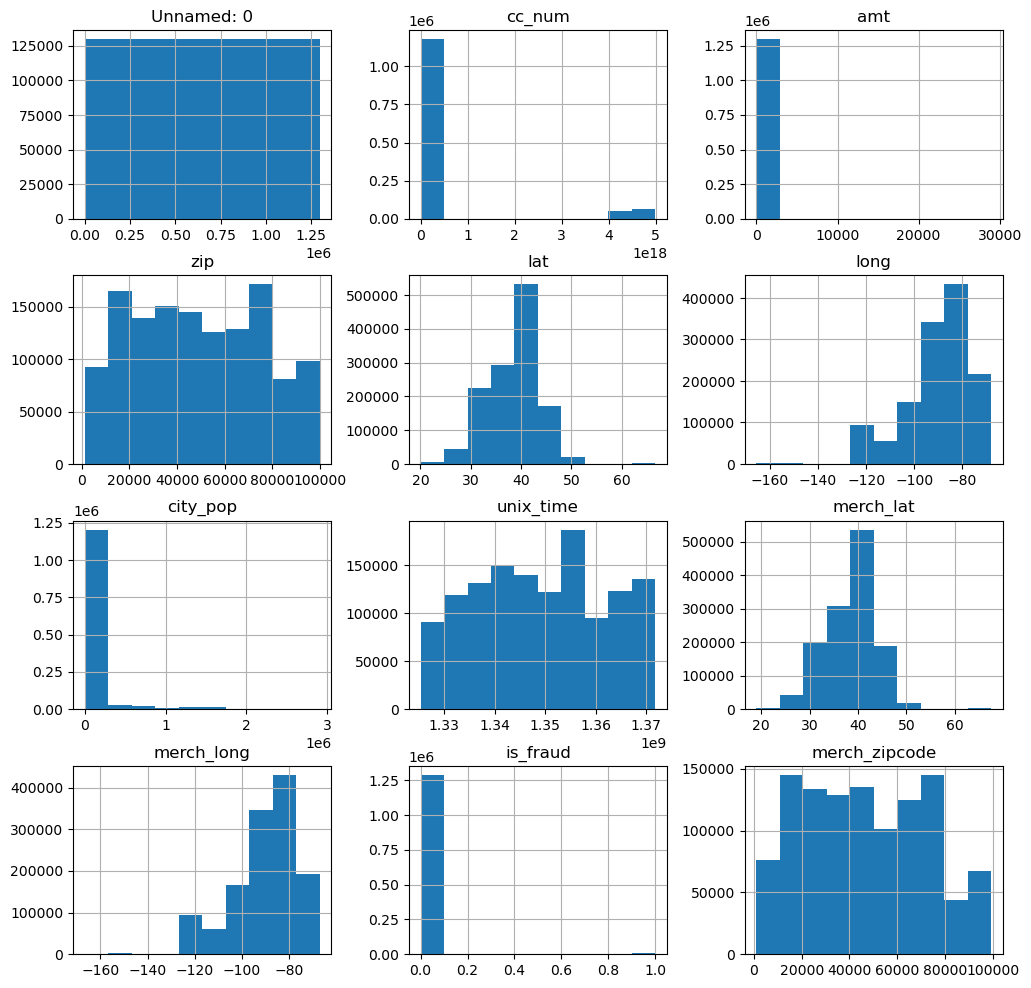

In [312]:
#histogram of all variables
df.hist(figsize=(12, 12))
plt.show()

In [313]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']) #converting date column to datetime

In [314]:
df['trans_date_trans_time'].dt.day_name() #extracting the day of the week

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [315]:
df['trans_date_trans_time'].min() #extracting the minimum date

Timestamp('2019-01-01 00:00:18')

In [316]:
df['trans_date_trans_time'].max() #extracting the maximum date

Timestamp('2020-06-21 12:13:37')

In [317]:
df['trans_date_trans_time'].max() -df['trans_date_trans_time'].min() #extracting the difference between maximum and minimum date

Timedelta('537 days 12:13:19')

In [318]:
filter_above_2019 = (df['trans_date_trans_time'] >='2019')
df.loc[filter_above_2019]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [319]:
filter_2021 = (df['trans_date_trans_time'] >='2019-11') & (df['trans_date_trans_time'] < '2020-03')
df.loc[filter_2021]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
713369,713369,2019-11-01 00:00:59,6511349151405438,fraud_Stiedemann Inc,misc_pos,146.13,Robert,Nguyen,M,74835 Garner Point,...,-114.8859,450,Interpreter,1946-08-24,070c73ca81d0ea17906f0970c33333e4,1351728059,40.151538,-115.107210,0,NaN
713370,713370,2019-11-01 00:01:47,4239436242473,fraud_Pacocha-O'Reilly,grocery_pos,58.18,James,Leon,M,826 Benjamin Stravenue,...,-77.1200,321490,"Scientist, biomedical",1991-10-04,f136b36f0116a7dd05ec518014683744,1351728107,39.370409,-76.782910,0,21133.0
713371,713371,2019-11-01 00:01:49,3531129874770000,fraud_Hudson-Ratke,grocery_pos,215.71,Shelby,Mitchell,F,974 Cindy Stream,...,-73.0882,5895,"Scientist, marine",1975-07-13,4ed5290d44cc8f287f8b778afc8832f7,1351728109,44.350184,-73.981793,0,12946.0
713372,713372,2019-11-01 00:03:21,630484879808,fraud_Kozey-Boehm,shopping_net,93.87,Ian,Patton,M,8088 Sherman Radial Suite 689,...,-120.0936,123,Early years teacher,1973-02-07,36fc29394a515fa7a030d1c70b93b518,1351728201,36.016656,-119.761741,0,NaN
713373,713373,2019-11-01 00:03:45,4810839835482794272,fraud_Bernhard Inc,gas_transport,60.50,Carolyn,Perez,F,433 Blake Roads Suite 967,...,-94.0492,760,Production manager,1985-08-31,6d79f702367ef1a819a6043ce246e49a,1351728225,36.091984,-94.287823,0,72704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024838,1024838,2020-02-28 23:57:58,568279015842,"fraud_Yost, Schamberger and Windler",kids_pets,39.31,Micheal,Hernandez,M,6139 Mark Rapid Apt. 651,...,-96.7909,291,Television floor manager,1991-05-01,e7ec30077979faca9590fb0c70bf9615,1362095878,47.524883,-97.064619,0,58223.0
1024839,1024839,2020-02-28 23:58:35,6011367958204270,fraud_Botsford and Sons,home,36.81,Tammy,Ayers,F,1652 James Mews,...,-81.7453,7646,Medical sales representative,1988-09-15,22bf9fa229b071670344f64b78bee708,1362095915,41.959456,-82.459501,0,NaN
1024840,1024840,2020-02-28 23:59:10,4761403817546679245,fraud_Altenwerth-Kilback,home,71.82,Diana,Jacobs,F,69608 Perez Mountain Apt. 006,...,-91.9932,1679,Psychiatric nurse,1986-05-02,ae983051402a001bbc321c7a6d14ecfe,1362095950,35.699521,-92.475330,0,72629.0
1024841,1024841,2020-02-28 23:59:28,4063094974360571498,"fraud_Douglas, Schneider and Turner",shopping_pos,870.25,Patricia,Mendoza,F,1683 Davidson Freeway,...,-111.9817,2078,"Scientist, audiological",1963-06-13,1967056a8f72d240fc27331ebcd4fa2c,1362095968,42.499560,-111.275210,1,NaN


In [320]:
df = df.drop(["Unnamed: 0", "merchant", "first" , 'job',"last", "street", "trans_num","dob", "state"], axis=1)
df.head() #dropping the columns that are not needed

,trans_date_trans_time,cc_num,category,amt,gender,city,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,22844.0


In [321]:
cat_columns =['gender', 'trans_date_trans_time', 'amt','lat', 'zip', 'city_pop', 'is_fraud']
df_cat = df.astype(dict((i,'object') for i in  cat_columns))
df.dtypes
df_cat.dtypes
type(df_cat)
df_cat.head()

,trans_date_trans_time,cc_num,category,amt,gender,city,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.0,M,Boulder,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,22844.0


In [322]:
from scipy.sparse import lil_matrix

# Suppose you need a sparse matrix for a large dataset
rows, cols = 1274791, 1274791

# Create a sparse matrix instead of a dense one
sparse_matrix = lil_matrix((rows, cols), dtype=bool)

# Example: setting an element
sparse_matrix[0, 1] = True


In [323]:
#drop object variabes in  df_cat
df_cat = df_cat.drop(['category', 'city','trans_date_trans_time'], axis=1)

In [324]:
most_common_zip = df.groupby('city')['merch_zipcode'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
print(most_common_zip)

city
Achille                      73439.0
Acworth                       3251.0
Adams                        54666.0
Afton                        49721.0
Akron                        43749.0
                              ...   
Woods Cross                  82930.0
Woodville                    36272.0
Yellowstone National Park    59052.0
Zaleski                      45612.0
Zavalla                      77612.0
Name: merch_zipcode, Length: 894, dtype: float64


In [325]:
#Mapping the most common zip codes to a new DataFrame
df['zip_code'] = df.apply(
    lambda row: most_common_zip[row['city']] if pd.isna(row['merch_zipcode']) and row['city'] in most_common_zip.index else row['merch_zipcode'],
    axis=1)
print(df)

        trans_date_trans_time               cc_num       category     amt  \
0         2019-01-01 00:00:18     2703186189652095       misc_net    4.97   
1         2019-01-01 00:00:44         630423337322    grocery_pos  107.23   
2         2019-01-01 00:00:51       38859492057661  entertainment  220.11   
3         2019-01-01 00:01:16     3534093764340240  gas_transport   45.00   
4         2019-01-01 00:03:06      375534208663984       misc_pos   41.96   
...                       ...                  ...            ...     ...   
1296670   2020-06-21 12:12:08       30263540414123  entertainment   15.56   
1296671   2020-06-21 12:12:19     6011149206456997    food_dining   51.70   
1296672   2020-06-21 12:12:32     3514865930894695    food_dining  105.93   
1296673   2020-06-21 12:13:36     2720012583106919    food_dining   74.90   
1296674   2020-06-21 12:13:37  4292902571056973207    food_dining    4.30   

        gender                      city    zip      lat      long  city_po

In [326]:
df = df.drop(['merch_zipcode', 'city'], axis=1)
df = pd.DataFrame(df)
#label encode gender in df_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat['gender'] = le.fit_transform(df_cat['gender'])
df_cat.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,28705.0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,NaN
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,83236.0
3,3534093764340240,45.0,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,NaN
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,22844.0


In [327]:
df_cat.isna().sum()

cc_num                0
amt                   0
gender                0
zip                   0
lat                   0
long                  0
city_pop              0
unix_time             0
merch_lat             0
merch_long            0
is_fraud              0
merch_zipcode    195973
dtype: int64

In [328]:
#label encode gender in df_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat['gender'] = le.fit_transform(df_cat['gender'])
df_cat.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,28705.0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,NaN
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,83236.0
3,3534093764340240,45.0,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,NaN
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,22844.0


In [338]:
#drop merch_zipcode
df_cat = df_cat.drop(['merch_zipcode'], axis=1)
df_cat = pd.DataFrame(df_cat)
df_cat.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


## Modelling

In [340]:
from imblearn.over_sampling import RandomOverSampler

# Define the oversampler
ros = RandomOverSampler(random_state=42)

# Separate features and target variable
x = df_cat.drop(columns='is_fraud')
y = df_cat['is_fraud']
df_sample = df_cat.sample(frac=0.1, random_state=42)  # Work with 10% of the data


# Apply the oversampler to balance the classes
#x_resampled, y_resampled = ros.fit_resample(x, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([x_resampled, y_resampled], axis=1)

# Check the new class distribution
print(df_resampled['is_fraud'].value_counts())


is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [341]:
print(x.shape)
print(y.shape)

(1296675, 9)
(1296675,)


In [342]:
from sklearn.model_selection import train_test_split , cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state=42)

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [347]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(max_iter=5000)
lrmodel.fit(x_train, y_train)


LogisticRegression(max_iter=5000)

In [346]:
from sklearn.ensemble import RandomForestClassifier#
#define classification report
from sklearn.metrics import classification_report
y_train = y_train.astype(int)

# Initialize and fit the GaussianNB model
model = GaussianNB() #create an instance of the model
model.fit(x_train, y_train) #train the model
y_pred = model.predict(x_test) #make predictions on the test set


[0 0 0 ... 0 0 0]
1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
421133     0
695406     0
1259079    0
137364     0
473850     0
Name: is_fraud, Length: 389003, dtype: object
